# Assignment-Time Series Analysis
Due on Oct. 24th

Please retrieve daily closing stock price of AT&T using `yahoo finance`. Then, do the following tasks:
    
Question 1. Analyze the descriptive statistics, draw line plot and explain your first impression about the stationarity of the data. (20 pts)

Question 2. Check the stationarity of the data using acf, pacf, and adf test and interpret if it is stationary.(20 pts)

Question 3. If the series is not stationary, please make it stationary.(20 pts)

Question 4. Model the series using moving average and autoregressive model with an optimum lag.(20 pts)

Questions 5. Visualize the result using train, test data and forecast in a single plot and calculate the predictive performance using RMSE metric.(20 pts)

In [1]:
#First use pip to install packages
!pip3 install yfinance
#!pip3 install PyPortfolioOpt

#set up 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)
import datetime
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


#### I chose the time period: October 2021 to October 2022.

In [2]:
stock = 'T'
start = datetime.datetime(2021,10,1)
end = datetime.datetime(2022,10,1)
t_close = yf.download(stock, start = start, end=end, interval='1d')['Close']

[*********************100%***********************]  1 of 1 completed


#### Question 1. Analyze the descriptive statistics, draw line plot and explain your first impression about the stationarity of the data. 

In [3]:
#descriptive stats

#show first 5 rows
t_close.head()

Date
2021-10-01    20.513596
2021-10-04    20.581572
2021-10-05    20.657101
2021-10-06    20.626888
2021-10-07    20.460726
Name: Close, dtype: float64

In [4]:
#show last 5 rows 
t_close.tail()

Date
2022-09-26    15.67
2022-09-27    15.73
2022-09-28    15.83
2022-09-29    15.53
2022-09-30    15.34
Name: Close, dtype: float64

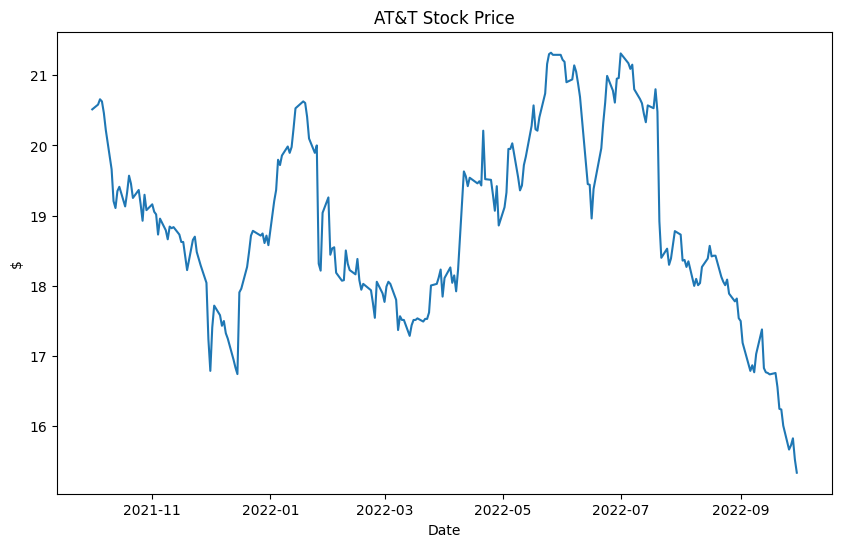

In [5]:
#line plot
plt.plot(t_close)
plt.xlabel('Date')
plt.ylabel('$')
plt.title('AT&T Stock Price')
plt.show()

In [6]:
#need to learn about the time series components
!pip3 install statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 125.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 KB 57.0 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


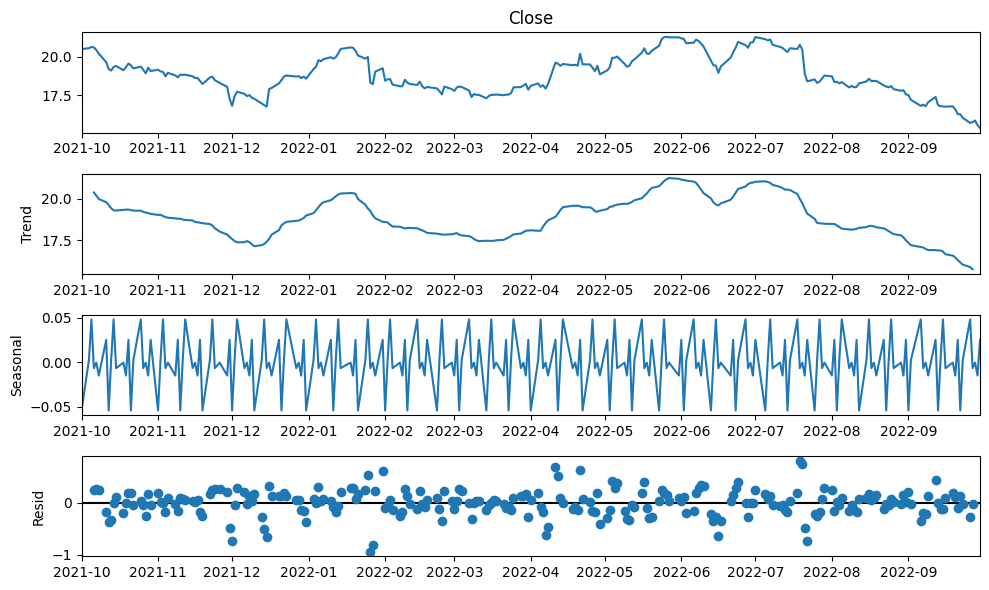

In [7]:
decomposition = seasonal_decompose(t_close, model='additive', period=7)
decomposition.plot()
plt.show()

#### First graph (behavior of raw data): Seems stable over the last year, but on a downward trend, tanking in September 2022.
#### Second graph (trend/overall movement): increasingly downward.
#### Third graph (seasonality): consistent
#### Fourth graph (residuals): distribution looks volatile (so not stationary)

In [8]:
#check for nulls
t_close.isnull().values.any()
#t_close.isnull().sum() gives zero

False

#### No need for imputation.

In [9]:
#convert to df
df = pd.DataFrame(t_close)

#### Use isolation forest to detect anomalies.

In [46]:
t_close.head()

Date
2021-10-01    20.513596
2021-10-04    20.581572
2021-10-05    20.657101
2021-10-06    20.626888
2021-10-07    20.460726
Name: Close, dtype: float64

In [47]:
type(t_close)

pandas.core.series.Series

In [10]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
t_scaled = scaler.fit_transform(t_close.values.reshape(-1,1))
t_scaled = pd.DataFrame(t_scaled)

In [12]:
np.arange(0.01, 0.05, 0.01)

array([0.01, 0.02, 0.03, 0.04])

In [13]:
contamination = np.arange(0.01, 0.05, 0.01)
outliers = []
for i in contamination:
    isolation_forest = IsolationForest(contamination=i)
    isolation_forest.fit(t_scaled)
    outliers.append(isolation_forest.predict(t_scaled))
    df['anomaly'] = isolation_forest.predict(t_scaled)

In [14]:
outliers

[array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1, 

In [15]:
df['anomaly'].value_counts()

 1    241
-1     11
Name: anomaly, dtype: int64

In [16]:
df[df['anomaly']==-1]

,Close,anomaly
Date,,
2022-05-26,21.320000,-1
2022-06-01,21.219999,-1
2022-07-01,21.309999,-1
2022-09-20,16.559999,-1
2022-09-21,16.250000,-1
2022-09-23,16.010000,-1
2022-09-26,15.670000,-1
2022-09-27,15.730000,-1
2022-09-28,15.830000,-1


In [17]:
df['Close'].describe()

count    252.000000
mean      18.826359
std        1.318002
min       15.340000
25%       18.004532
50%       18.708459
75%       19.807055
max       21.320000
Name: Close, dtype: float64

#### Question 2/3. Check the stationarity of the data using acf, pacf, and adf test and interpret if it is stationary. If the series is not stationary, please make it stationary.


In [18]:
#stationary time series means no trends or seasonality (time observed has no impact on data)

#to make data stationary, take the first differences

t_diff = t_close.diff().dropna() #dropna is not necessary since there are no nulls
t_diff

Date
2021-10-04    0.067976
2021-10-05    0.075529
2021-10-06   -0.030212
2021-10-07   -0.166162
2021-10-08   -0.241693
                ...   
2022-09-26   -0.340000
2022-09-27    0.059999
2022-09-28    0.100000
2022-09-29   -0.300000
2022-09-30   -0.190000
Name: Close, Length: 251, dtype: float64

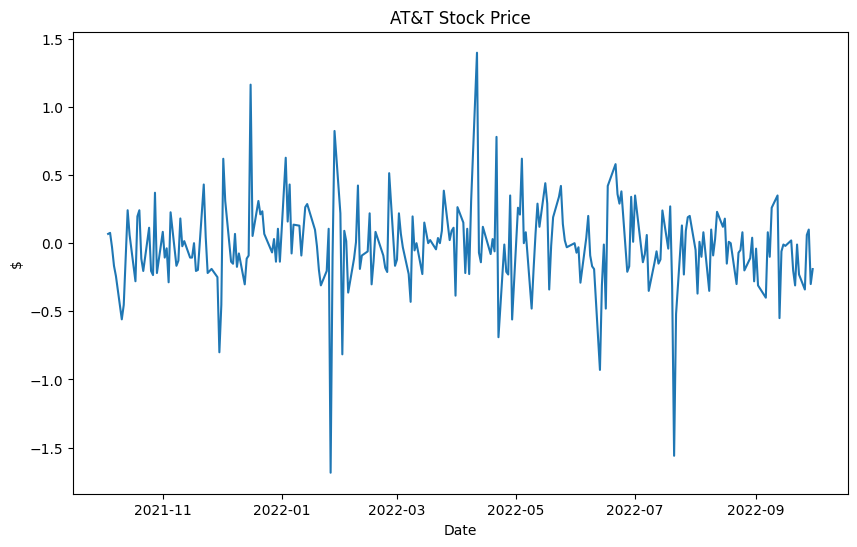

In [19]:
plt.plot(t_diff)
plt.xlabel('Date')
plt.ylabel('$')
plt.title('AT&T Stock Price')
plt.show()

In [20]:
#ADF
from statsmodels.tsa.stattools import adfuller
stat_test = adfuller(t_close)
print('The test statistic is {} and p-value is {}'.format(stat_test[0], stat_test[1]))

The test statistic is -1.516204104132442 and p-value is 0.5254807151272904


#### P value is higher than .05, suggesting data is non-stationary.

In [21]:
stat_test = adfuller(t_diff)
print('The test statistic is {} and p-value is {}'.format(stat_test[0], stat_test[1]))

The test statistic is -14.240988797661178 and p-value is 1.5378153867032552e-26


#### Looking at the P value now, data is stationary.

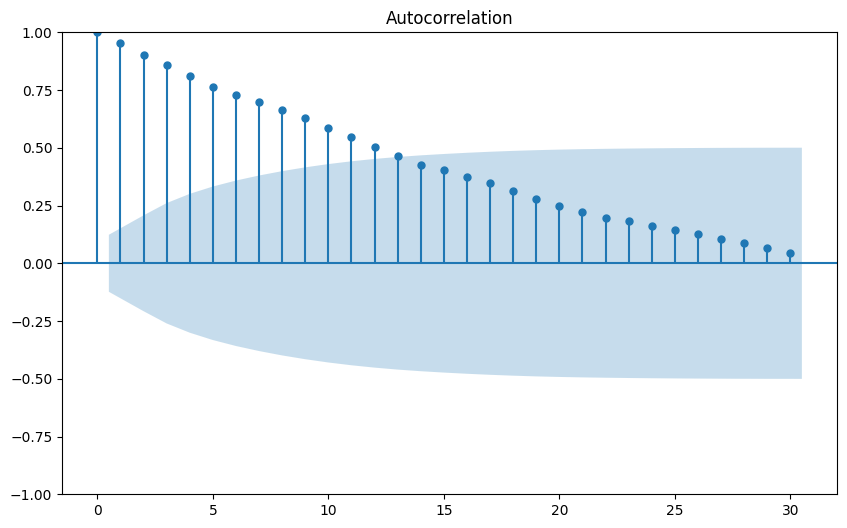

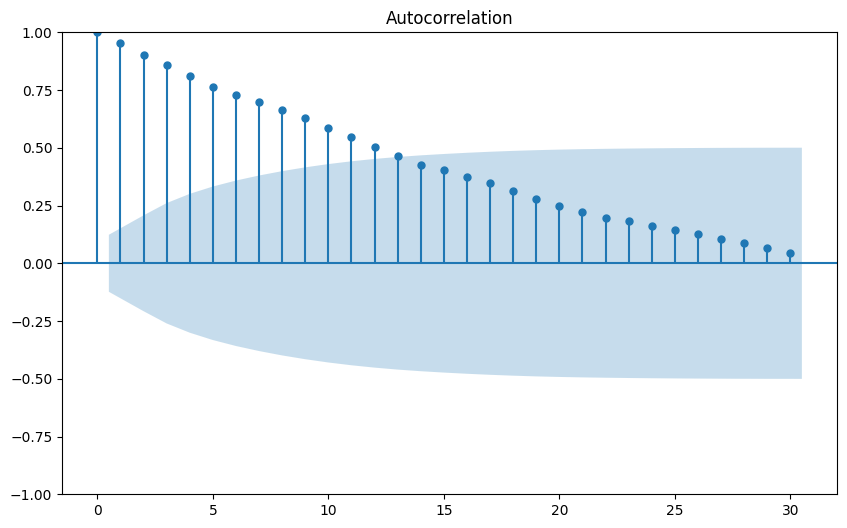

In [22]:
#ACF serial dependence 
#when time-series is highly corrleated with its lagged version, shown by acf plot
#longer the bar, the more dependence a series has

import statsmodels.api as sm
sm.graphics.tsa.plot_acf(t_close, lags=30)

#### acf is steadily decaying, which is an indicator of non-stationarity. 

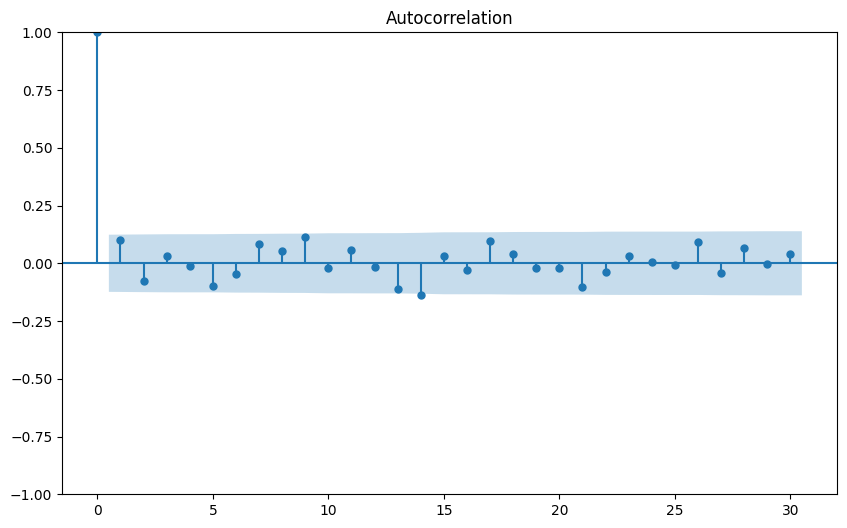

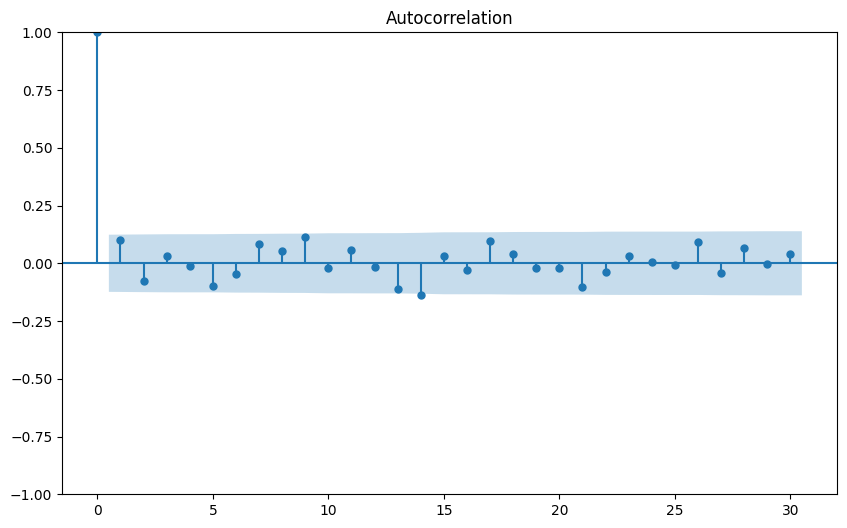

In [23]:
sm.graphics.tsa.plot_acf(t_diff, lags=30)

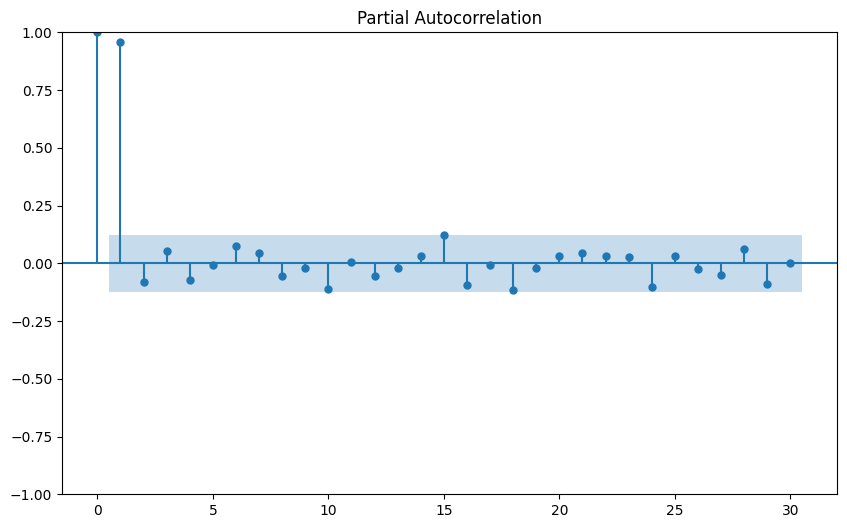

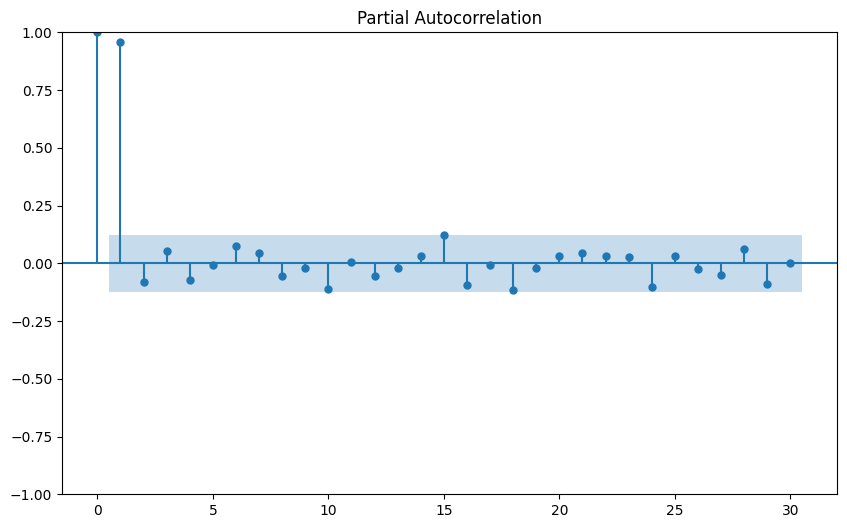

In [24]:
#PACF
sm.graphics.tsa.plot_pacf(t_close, lags=30)

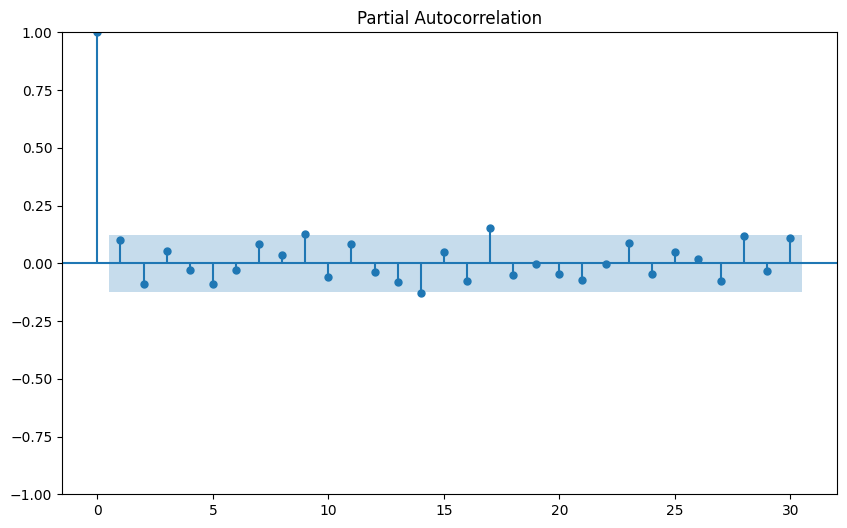

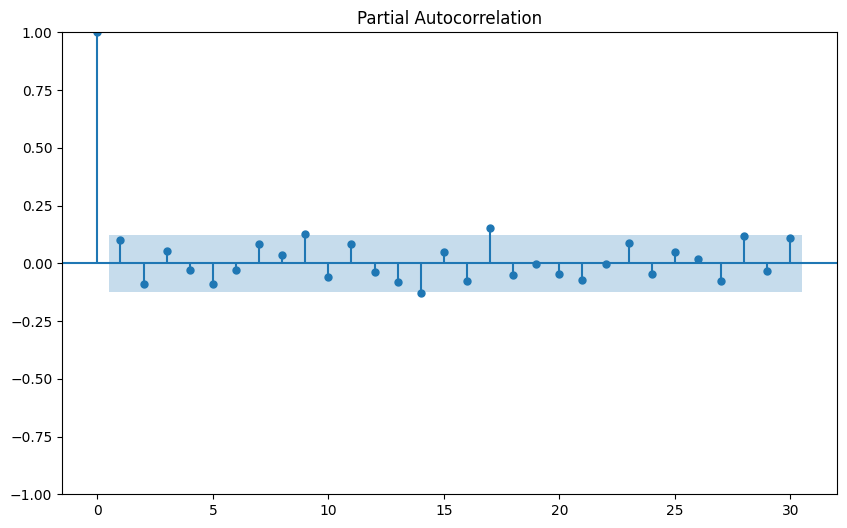

In [25]:
sm.graphics.tsa.plot_pacf(t_diff, lags=30)

#### Time series was non-stationary (t_close) but after taking the first difference (.diff()), time series became stationary (t_diff).

#### Question 4/5 Model the series using moving average and autoregressive model with an optimum lag. Visualize the result using train, test data and forecast in a single plot and calculate the predictive performance using RMSE metric.

In [26]:
#Moving average 
from statsmodels.tsa.arima.model import ARIMA

In [27]:
train_len = int(len(t_diff) * 0.8)
diff_train = t_diff[:train_len]
diff_test = t_diff[train_len:]

In [28]:
start = len(diff_train)
end = len(diff_train) + len(diff_test) - 1

In [29]:
ma_model = ARIMA(diff_train, order=(0, 0, 8))
ma_result = ma_model.fit()

/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [30]:
ma_pred = ma_result.predict(start, end)
ma_pred.index = diff_test.index

/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


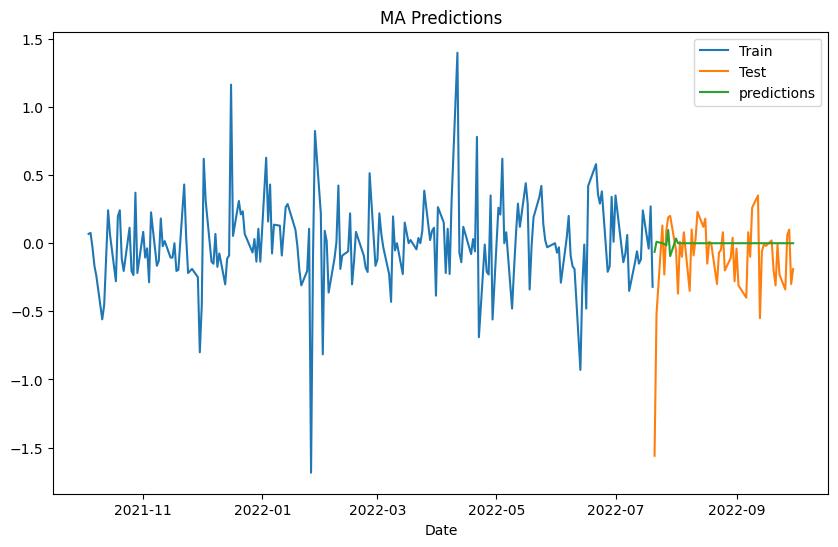

In [31]:
plt.plot(diff_train.index, diff_train, label='Train')
plt.plot(diff_test.index, diff_test, label='Test')
plt.plot(ma_pred.index , ma_pred, label='predictions')
plt.title('MA Predictions')
plt.legend()
plt.xlabel('Date')
plt.show()

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae_ma = mean_absolute_error(diff_test, ma_pred)
mse_ma = mean_squared_error(diff_test, ma_pred)
rmse_ma = np.sqrt(mean_squared_error(diff_test, ma_pred))

In [33]:
ma_perf = {'mae_ma': mae_ma,
             'mse_ma':mse_ma,
             'rmse_ma':rmse_ma}
ma_perf = pd.DataFrame([ma_perf])
ma_perf

,mae_ma,mse_ma,rmse_ma
0,0.193065,0.089555,0.299257


In [34]:
ma_model = ARIMA(t_diff, order=(0, 0, 8))
ma_result = ma_model.fit()

/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [35]:
forecast_index = pd.date_range(diff_test.index[-1], periods=10)

In [36]:
ma_forecast = ma_result.forecast(steps=10)
ma_forecast.index = forecast_index

/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


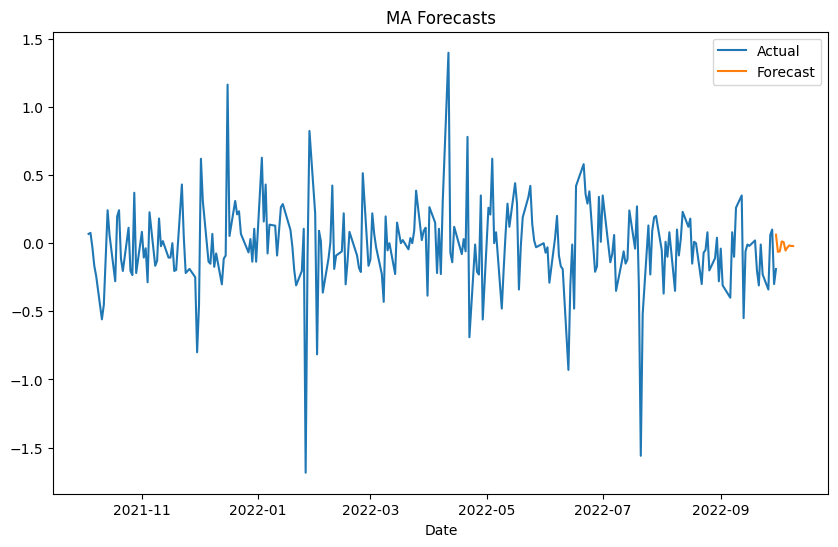

In [37]:
plt.plot(t_diff.index, t_diff, label='Actual')
plt.plot(ma_forecast.index, ma_forecast, label='Forecast')
plt.legend()
plt.title('MA Forecasts')
plt.xlabel('Date')
plt.show()

#### The forecasting looks pretty good.

In [38]:
#Autoregressive model
#regress the current value of a series over its lagged values

ar_model = ARIMA(diff_train, order=(8, 0, 0))
ar_result = ar_model.fit()

/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [39]:
ar_pred = ar_result.predict(start, end)
ar_pred.index = diff_test.index

/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


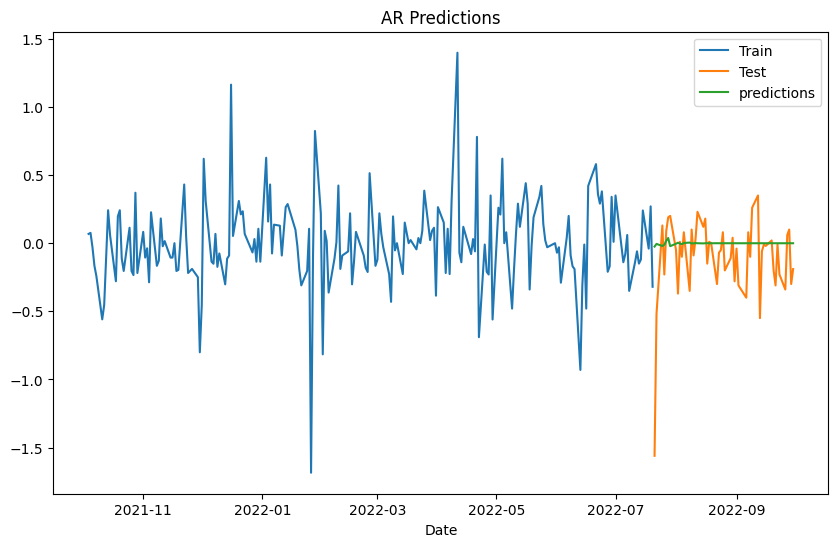

In [40]:
plt.plot(diff_train.index, diff_train, label='Train')
plt.plot(diff_test.index, diff_test, label='Test')
plt.plot(ar_pred.index , ar_pred, label='predictions')
plt.title('AR Predictions')
plt.legend()
plt.xlabel('Date')
plt.show()

In [41]:
mae_ar = mean_absolute_error(diff_test, ar_pred)
mse_ar = mean_squared_error(diff_test, ar_pred)
rmse_ar = np.sqrt(mean_squared_error(diff_test, ar_pred))

In [42]:
ar_perf = {'mae_ar': mae_ar,
             'mse_ar':mse_ar,
             'rmse_ar':rmse_ar}
ar_perf = pd.DataFrame([ar_perf])
ar_perf

,mae_ar,mse_ar,rmse_ar
0,0.19218,0.091016,0.301688


In [43]:
ar_model = ARIMA(t_diff, order=(8, 0, 0))
ar_result = ar_model.fit()

/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [44]:
ar_forecast = ar_result.forecast(steps=10)
ar_forecast.index = forecast_index

/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


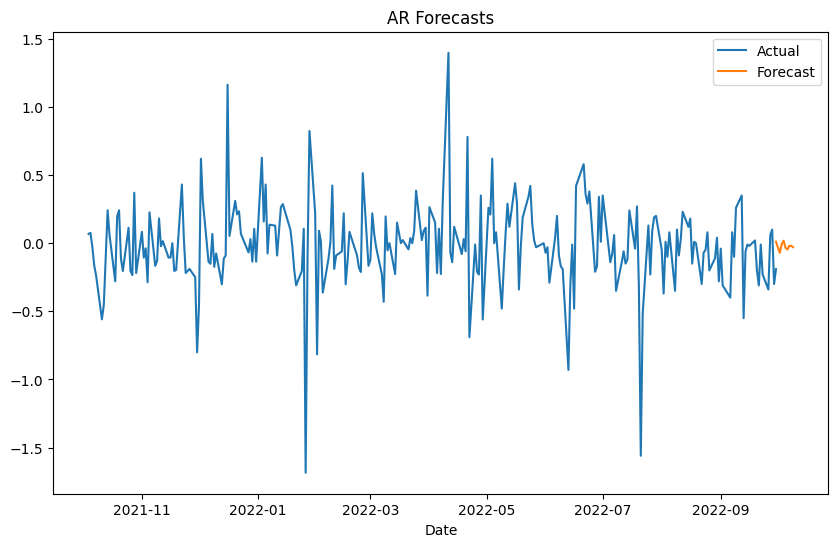

In [45]:
plt.plot(t_diff.index, t_diff, label='Actual')
plt.plot(ar_forecast.index, ar_forecast, label='Forecast')
plt.legend()
plt.title('AR Forecasts')
plt.xlabel('Date')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=310a33be-f512-48c8-8707-dc5137fbcc75' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>